# Combining the Daily Data
1. Need to combine the daily status data saved by year in CSV files.  
2. Adjust the data so the total hours for each day equals 24. 

In [1]:
# set up path to import my python scripts
import sys
import os
src_path = os.path.abspath(os.path.join('..'))
if src_path not in sys.path:
    sys.path.append(src_path+"/src")

In [2]:
%load_ext autoreload
%autoreload 2
import prep_data as prep

In [3]:
import pandas as pd
import numpy as np
import glob

In [4]:
status_csv_files = sorted(glob.glob('../data/status_hours*.csv'))
status_csv_files

['../data/status_hours_1994.csv',
 '../data/status_hours_1995.csv',
 '../data/status_hours_1996.csv',
 '../data/status_hours_1997.csv',
 '../data/status_hours_1998.csv',
 '../data/status_hours_1999.csv',
 '../data/status_hours_2000.csv',
 '../data/status_hours_2001.csv',
 '../data/status_hours_2002.csv',
 '../data/status_hours_2003.csv',
 '../data/status_hours_2004.csv',
 '../data/status_hours_2005.csv',
 '../data/status_hours_2006.csv',
 '../data/status_hours_2007.csv',
 '../data/status_hours_2008.csv',
 '../data/status_hours_2009.csv',
 '../data/status_hours_2010.csv',
 '../data/status_hours_2011.csv',
 '../data/status_hours_2012.csv',
 '../data/status_hours_2013.csv',
 '../data/status_hours_2014.csv',
 '../data/status_hours_2015.csv',
 '../data/status_hours_2016.csv',
 '../data/status_hours_2017.csv',
 '../data/status_hours_2018.csv',
 '../data/status_hours_2019.csv']

In [7]:
df = prep.combine_status_hour_dfs('../data/')


First day: 1994-09-11
Last day : 1994-12-31
Length of df: 108

First day: 1995-01-01
Last day : 1995-12-31
Length of df: 352

First day: 1996-01-01
Last day : 1996-12-31
Length of df: 364

First day: 1997-01-01
Last day : 1997-12-31
Length of df: 359

First day: 1998-01-01
Last day : 1998-12-31
Length of df: 361

First day: 1999-01-01
Last day : 1999-12-31
Length of df: 344

First day: 2000-01-03
Last day : 2000-12-31
Length of df: 361

First day: 2001-01-01
Last day : 2001-12-31
Length of df: 353

First day: 2002-01-01
Last day : 2002-12-31
Length of df: 364

First day: 2003-01-01
Last day : 2003-12-31
Length of df: 362

First day: 2004-01-01
Last day : 2004-12-31
Length of df: 362

First day: 2005-01-01
Last day : 2005-12-31
Length of df: 358

First day: 2006-01-01
Last day : 2006-12-31
Length of df: 286

First day: 2007-01-01
Last day : 2007-12-31
Length of df: 363

First day: 2008-01-01
Last day : 2008-12-31
Length of df: 362

First day: 2009-01-01
Last day : 2009-12-31
Length of 

Most years do not have data for every day of the year.

In [8]:
df

,Green,Yellow,Red
date,,,
1994-09-11,6.000000,NaN,0.666667
1994-09-12,23.000000,NaN,1.000000
1994-09-13,22.500000,NaN,1.500000
1994-09-14,24.000000,NaN,NaN
1994-09-15,15.333333,NaN,0.166667
...,...,...,...
2019-12-27,0.580556,0.052778,22.686111
2019-12-28,4.013889,3.863889,15.405556
2019-12-29,3.377778,4.997222,14.891667


In [53]:
df_temp = df.copy()
df_temp['year'] = df['date'].dt.year
df_temp['month'] = df['date'].dt.month
df_temp.groupby(['year','month']).count()

date  Green  Yellow  Red
year month                          
1994 9        20     20       2    9
     10       28     28       2    7
     11       29     29      18   22
     12       31     30       9   13
1995 1        29     25      13   16
...          ...    ...     ...  ...
2019 7        31     28      30   31
     8        31     29      29   31
     9        30     30      29   30
     11       26     25      26   26
     12       31     22      27   31

[301 rows x 4 columns]

In [54]:
df

,date,Green,Yellow,Red
0,1994-09-11,6.000000,NaN,0.666667
1,1994-09-12,23.000000,NaN,1.000000
2,1994-09-13,22.500000,NaN,1.500000
3,1994-09-14,24.000000,NaN,NaN
4,1994-09-15,15.333333,NaN,0.166667
...,...,...,...,...
8960,2019-12-27,0.580556,0.052778,22.686111
8961,2019-12-28,4.013889,3.863889,15.405556
8962,2019-12-29,3.377778,4.997222,14.891667
8963,2019-12-30,4.697222,5.113889,13.483333


## Normalize to 24 total hours

The function for it

In [165]:
df_norm = prep.normalize_daily_hours_to_24(df)
df_norm

,Green,Yellow,Red
date,,,
1994-09-11,21.600000,NaN,2.400000
1994-09-12,23.000000,NaN,1.000000
1994-09-13,22.500000,NaN,1.500000
1994-09-14,24.000000,NaN,NaN
1994-09-15,23.741935,NaN,0.258065
...,...,...,...
2019-12-27,0.597499,0.054318,23.348183
2019-12-28,4.137437,3.982820,15.879742
2019-12-29,3.484241,5.154728,15.361032


## Label months to be able to make comparisons

In [156]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [159]:
df_norm.reset_index(inplace=True)
df_norm['month'] = pd.Categorical(df_norm['date'].dt.strftime('%b'),categories=months,ordered=True)
df_norm['year'] = df_norm['date'].dt.year
df_norm.set_index('date',inplace=True)

In [169]:
# function created
prep.add_month_year_columns(df_norm)
df_norm

,Green,Yellow,Red,month,year
date,,,,,
1994-09-11,21.600000,NaN,2.400000,Sep,1994
1994-09-12,23.000000,NaN,1.000000,Sep,1994
1994-09-13,22.500000,NaN,1.500000,Sep,1994
1994-09-14,24.000000,NaN,NaN,Sep,1994
1994-09-15,23.741935,NaN,0.258065,Sep,1994
...,...,...,...,...,...
2019-12-27,0.597499,0.054318,23.348183,Dec,2019
2019-12-28,4.137437,3.982820,15.879742,Dec,2019
2019-12-29,3.484241,5.154728,15.361032,Dec,2019


In [160]:
df_norm.groupby('month').count()

,Green,Yellow,Red,year
month,,,,
Jan,688,627,639,765
Feb,604,533,554,683
Mar,671,599,620,747
Apr,700,592,589,745
May,745,625,576,773
Jun,719,627,584,747
Jul,738,657,623,773
Aug,718,633,600,743
Sep,710,606,602,724


In [164]:
df_norm.groupby('month').mean().sort_values('month')

,Green,Yellow,Red,year
month,,,,
Jan,13.874424,3.965391,9.903124,2007.052288
Feb,13.514829,3.869910,11.130653,2006.639824
Mar,13.362150,3.682512,10.897053,2006.653280
Apr,14.053281,3.240913,10.397424,2007.051007
May,13.923988,3.244171,10.678858,2007.007762
Jun,14.167622,3.268703,9.746580,2006.990629
Jul,13.736813,3.269413,10.058151,2007.016818
Aug,14.154354,3.446387,9.146018,2006.855989
Sep,14.045049,3.196428,9.081362,2006.755525


In [163]:
df_norm.groupby(['month','year']).mean()

Green    Yellow        Red
month year                                
Jan   1994        NaN       NaN        NaN
      1995  17.827511  5.856665  10.885974
      1996  17.502292  4.371083   7.012587
      1997  13.771605  3.909722  13.916667
      1998  20.971389  3.203047   7.006327
...               ...       ...        ...
Dec   2015   4.713865  2.451930  18.208876
      2016   3.313360  2.538625  20.652056
      2017  11.203028  3.610313  10.503746
      2018   6.116859  3.643936  15.066251
      2019   7.909615  2.007879  16.637927

[312 rows x 3 columns]

month
Apr    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Aug    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Dec    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Feb    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Jan    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Jul    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Jun    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Mar    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
May    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Nov    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Oct    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Sep    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

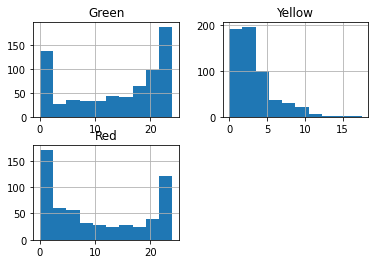

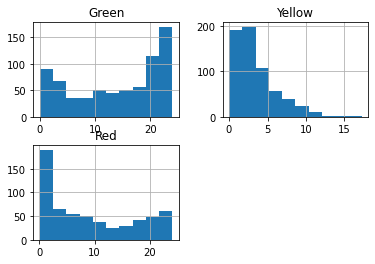

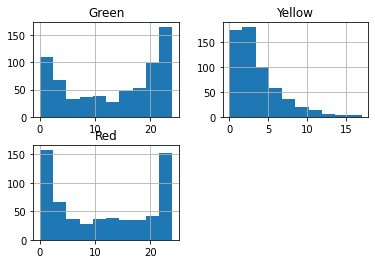

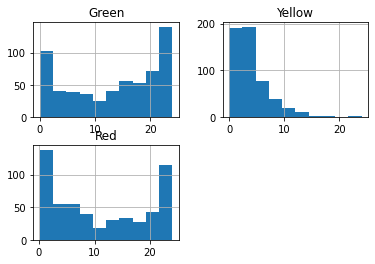

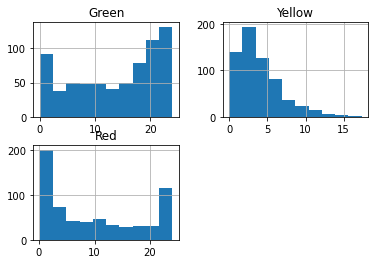

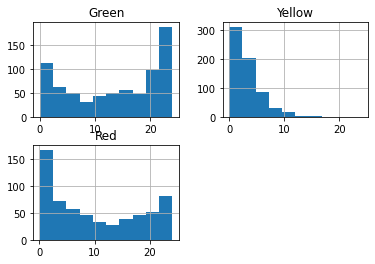

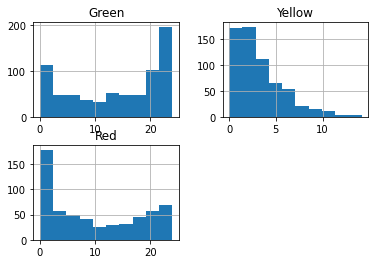

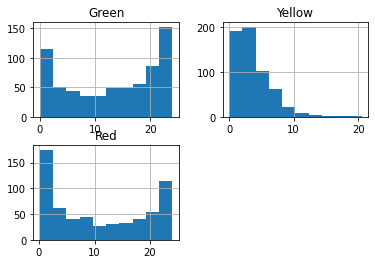

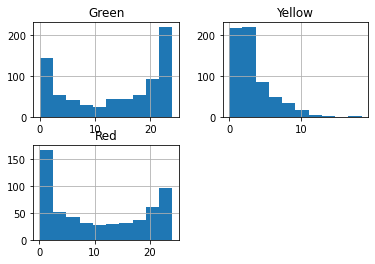

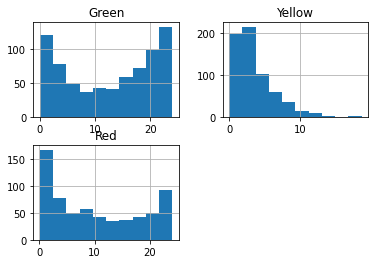

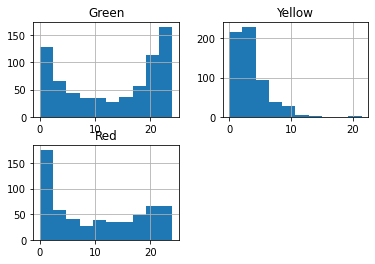

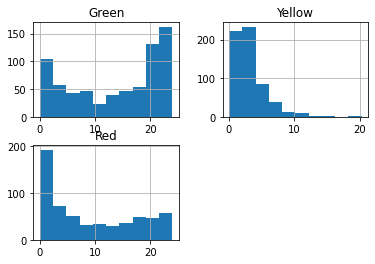

In [147]:
df_norm.groupby(['month']).hist(['Green','Yellow','Red'])